##Import

In [ ]:
import numpy as np
import pandas as pd

from pprint import pprint

import datetime
import time

from google.colab import files
import seaborn as sns; sns.set(style="ticks", color_codes=True)

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from matplotlib.colors import ListedColormap

from geopy.distance import geodesic
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.utils import shuffle

from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

import nltk
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import string

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True) #allows to work in a notebook
cf.go_offline() #allows cufflinks to work offline

import plotly.graph_objs as go

import datetime





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [ ]:
sns.set_palette('Set2')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_credit_num = pd.read_excel("drive/My Drive/Colab Notebooks/default of credit card clients.xls",header = 1)
df_credit = df_credit_num
df_credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


##Basic Info

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

The dataset contains 30000 cases and no missing data

In [ ]:
df_credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

##Converting Number Labels into Labels

In [ ]:
df_credit['SEX'] = df_credit['SEX'].apply(lambda x : 'Male' if x == 1 else ('Female' if x == 2 else x))

In [ ]:
df_credit['EDUCATION'] = df_credit['EDUCATION'].apply(lambda x : 'Graduate School' if x == 1 else ('University' if x == 2 else ('High School' if x == 3 else ('Other' if x == 4 else 'Unknown'))))

In [ ]:
df_credit['MARRIAGE'] = df_credit['MARRIAGE'].apply(lambda x : 'Married' if x == 1 else ('Single' if x == 2 else ('Neither' if x == 3 else 'Unknown')))

Will relabel in the dataset for easier visualization and understanding. Later these labels could be converted back into numerical values 

##Some Investigation

The probability of defaulting on the next payment is 

In [ ]:
df_credit['default payment next month'].sum()/len(df_credit['default payment next month'])

0.2212

In [ ]:
df_credit.groupby('default payment next month')['default payment next month'].count()


default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64

Because there are only 22% people who defaulted payment, it means any model "All No Occurance" that simply assigns all labels as negative (false or true negatives), the model would result in 80% accuracy.
This means accuracy could be a misleading metric in identifying the best model to use.

We are going to use Matthew's Correlation Coefficient to evaluate models, as it is most suitable for unbalanced data. We would also keep f1 and accuracy scores to compare these 

In [ ]:
df_credit[df_credit['BILL_AMT1']<0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
26,27,60000,Male,Graduate School,Single,27,1,-2,-1,-1,-1,-1,-109,-425,259,-57,127,-189,0,1000,0,500,0,1000,1
68,69,130000,Female,High School,Single,29,1,-2,-2,-1,2,-1,-190,-9850,-9850,10311,10161,7319,0,0,20161,0,7319,13899,0
92,93,100000,Female,Graduate School,Single,27,-2,-2,-2,-2,-2,-2,-2000,5555,0,0,0,0,7555,0,0,0,0,0,0
101,102,380000,Female,Graduate School,Single,30,-2,-2,-1,0,0,0,-81,-303,32475,32891,33564,34056,223,33178,1171,1197,1250,5000,0
109,110,360000,Male,University,Married,35,1,-2,-2,-2,-2,-2,-103,-103,-103,-103,-103,-103,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29845,29846,10000,Male,University,Married,37,1,-2,-1,3,2,0,-265,-265,5235,5007,4779,7680,0,5500,0,0,3000,2000,1
29851,29852,270000,Male,University,Single,36,1,-1,-1,-2,-1,0,-16,3326,-54,-54,19315,8388,3342,0,0,19369,996,3,0
29922,29923,150000,Male,University,Married,35,1,-2,-2,-2,-2,-2,-18,-18,-18,-18,-18,-18,0,0,0,0,0,0,0
29962,29963,50000,Male,University,Single,30,1,-1,2,-1,-1,-2,-264,264,264,7300,0,0,528,0,7300,0,0,0,0


Let's rename "PAY_0" into "PAY_1" to make our lives easier

In [ ]:
df_credit.rename(columns={"PAY_0": "PAY_1"}, inplace=True)

In [ ]:
df_credit['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

It seems there are not so many people that are more than 3 months overdue. I wonder if small sample size would cause the model to not predict properly.. Let's go through all "PAY_X" columns and assign all values 3 and up to 3 (three months is already a pretty long time)

In [ ]:
for i in range(1,7):
  df_credit[f'PAY_{i}'] = df_credit[f'PAY_{i}'].apply(lambda x: 3 if x>2 else x)

### Marriage investigation

In [ ]:
df_credit['MARRIAGE'].value_counts()

Single     15964
Married    13659
Neither      323
Unknown       54
Name: MARRIAGE, dtype: int64

Unknown Marriage status is such an under-represented sample. To make an educated decision on what to do with it, let's see what customers are there

In [ ]:
df_credit[df_credit['MARRIAGE'] == 'Unknown']['SEX'].value_counts()

Female    40
Male      14
Name: SEX, dtype: int64

In [ ]:
df_credit[df_credit['MARRIAGE'] == 'Unknown']['PAY_1'].value_counts()

 0    20
-1    15
 1     7
-2     7
 2     4
 3     1
Name: PAY_1, dtype: int64

In [ ]:
df_credit[df_credit['MARRIAGE'] == 'Unknown']['default payment next month'].value_counts()

0    49
1     5
Name: default payment next month, dtype: int64

In [ ]:
df_credit[["MARRIAGE", "default payment next month"]].groupby(['MARRIAGE'], as_index=False).mean().sort_values(by='default payment next month', ascending=False)

,MARRIAGE,default payment next month
1,Neither,0.260062
0,Married,0.234717
2,Single,0.209283
3,Unknown,0.092593


It seems "Unknown" marital status has very low probability of defaulting. Initially I thought to combine "Neither" and "Unknown" if their probability of defaulting would be similar, but with this sample it does not seem to be the case. As far as I know, "Unknown" may as well be missing data. "Not defaulting" is already a majority class, so the model may only benefit if I would simply drop these customers from the model.

In [ ]:
for i in range(0, df_credit.shape[0]):
  if df_credit['MARRIAGE'][i] == 'Unknown':
    df_credit.drop(index = i, inplace=True, axis = 0)
df_credit.reset_index(inplace=True, drop = True)


In [ ]:
df_credit['EDUCATION'].value_counts()

University         14024
Graduate School    10581
High School         4873
Unknown              345
Other                123
Name: EDUCATION, dtype: int64

In [ ]:
df_credit[["EDUCATION", "default payment next month"]].groupby(['EDUCATION'], as_index=False).mean().sort_values(by='default payment next month', ascending=False)

,EDUCATION,default payment next month
1,High School,0.253027
3,University,0.237379
0,Graduate School,0.192420
4,Unknown,0.075362
2,Other,0.056911


Defaulting probability for "Unknown" and "other" are so abnormally low. Let's investigate these two as well

###Education investigation

In [ ]:
df_credit[df_credit['EDUCATION'] == 'Unknown']['SEX'].value_counts()

Female    217
Male      128
Name: SEX, dtype: int64

In [ ]:
df_credit[df_credit['EDUCATION'] == 'Other']['SEX'].value_counts()

Female    81
Male      42
Name: SEX, dtype: int64

In [ ]:
df_credit[df_credit['EDUCATION'] == 'Unknown']['PAY_1'].value_counts()


 0    218
-2     44
-1     38
 2     23
 1     19
 3      3
Name: PAY_1, dtype: int64

In [ ]:
df_credit[df_credit['EDUCATION'] == 'Other']['PAY_1'].value_counts()


 0    55
-2    29
-1    23
 1    13
 2     3
Name: PAY_1, dtype: int64

In [ ]:
df_credit[df_credit['EDUCATION'] == 'Unknown']['default payment next month'].value_counts()


0    319
1     26
Name: default payment next month, dtype: int64

In [ ]:
df_credit[df_credit['EDUCATION'] == 'Other']['default payment next month'].value_counts()


0    116
1      7
Name: default payment next month, dtype: int64

Taking into account that we have a dataset of 30 000 customers, and people with "Unknown" education are only 345 (where unknow clearly indicated missing data). People with education "Other" are only 123, which is very suspiciously low. I would assume it does not make for a good sample, and could be removed to improve performance of the model. Also the probability of default for these two samples were so low, that our minority class would not lose any representation

In [ ]:
for i in range(0, df_credit.shape[0]):
  if df_credit['EDUCATION'][i] == 'Unknown':
    df_credit.drop(index = i, inplace=True, axis = 0)
df_credit.reset_index(inplace=True, drop = True)

for i in range(0, df_credit.shape[0]):
  if df_credit['EDUCATION'][i] == 'Other':
    df_credit.drop(index = i, inplace=True, axis = 0)
df_credit.reset_index(inplace=True, drop = True)

##Plots

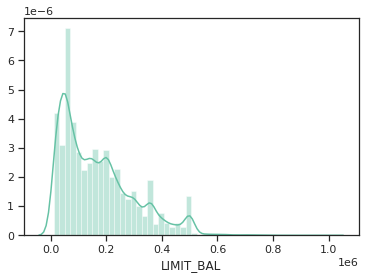

In [ ]:
sns.distplot(df_credit['LIMIT_BAL'])

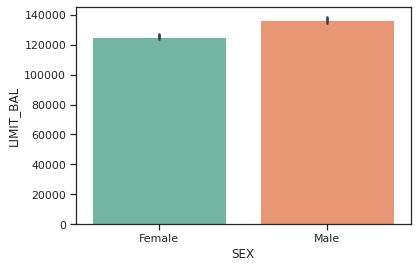

In [ ]:
sns.barplot(x='SEX',y='LIMIT_BAL',data=df_credit,estimator=np.std)


([<matplotlib.axis.XTick at 0x7f252dbfd048>,
 [Text(0, 0, 'Undocumented'),
  Text(0, 0, 'Married'),
  Text(0, 0, 'Single'),
  Text(0, 0, 'Others')])

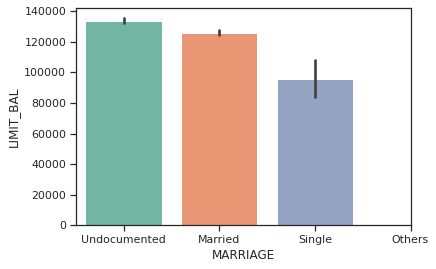

In [ ]:
sns.barplot(x='MARRIAGE',y='LIMIT_BAL',data=df_credit,estimator=np.std)
positions = (0, 1, 2, 3)
labels = ('Undocumented', "Married", "Single", 'Others')
plt.xticks(positions, labels)

([<matplotlib.axis.XTick at 0x7f252dbdb2b0>,
 [Text(0, 0, 'Default'), Text(0, 0, 'Not Default')])

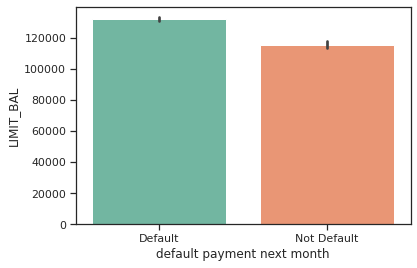

In [ ]:
sns.barplot(x='default payment next month',y='LIMIT_BAL',data=df_credit,estimator=np.std)
positions = (0, 1)
labels = ("Default", "Not Default")
plt.xticks(positions, labels)

Text(0.5, 1.0, 'Credit Amount (Male)')

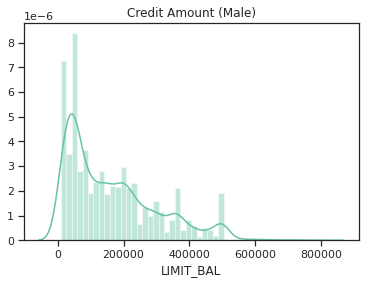

In [ ]:
sns.distplot(df_credit[df_credit['SEX']== 'Male']['LIMIT_BAL'])
plt.title('Credit Amount (Male)')


Text(0.5, 1.0, 'Credit Amount (Female)')

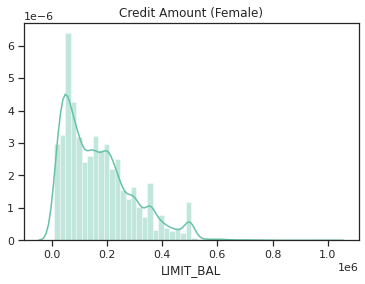

In [ ]:
sns.distplot(df_credit[df_credit['SEX']=='Female']['LIMIT_BAL'])
plt.title('Credit Amount (Female)')

###Pair Plots

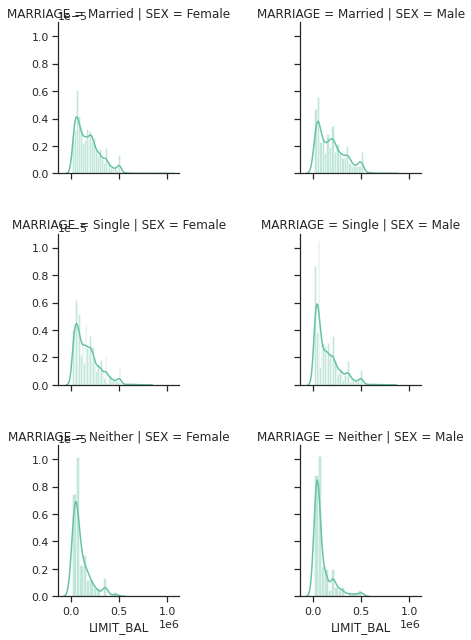

In [ ]:
g = sns.FacetGrid(df_credit, col="SEX",  row="MARRIAGE")
g = g.map(sns.distplot, "LIMIT_BAL")
plt.subplots_adjust(hspace=0.4, wspace=1)


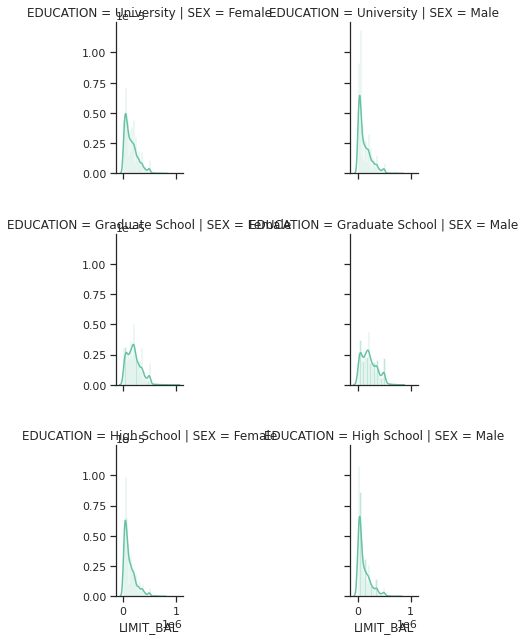

In [ ]:
g = sns.FacetGrid(df_credit, col="SEX",  row="EDUCATION")
g = g.map(sns.distplot, "LIMIT_BAL")
plt.subplots_adjust(hspace=0.4, wspace=2.5)

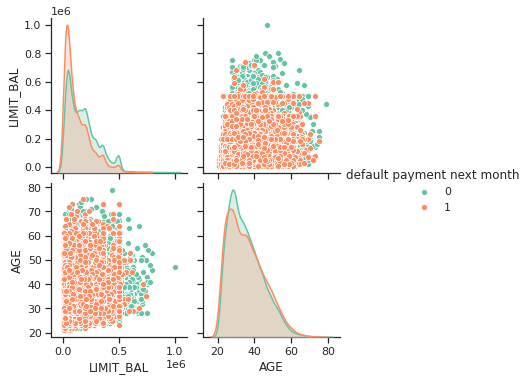

In [ ]:
df_credit_short = df_credit_num[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default payment next month']]
sns.pairplot(df_credit_short,hue = 'default payment next month')

Let's understand what these plots show us.

We could see strong clusters of 'defaulters' in a few plots. 
Age vs balance Limit.  Bigger Balances and older customers tend to default
Sex vs Balance limit shows that there is not quite a distinction between sexes in the situation of default.


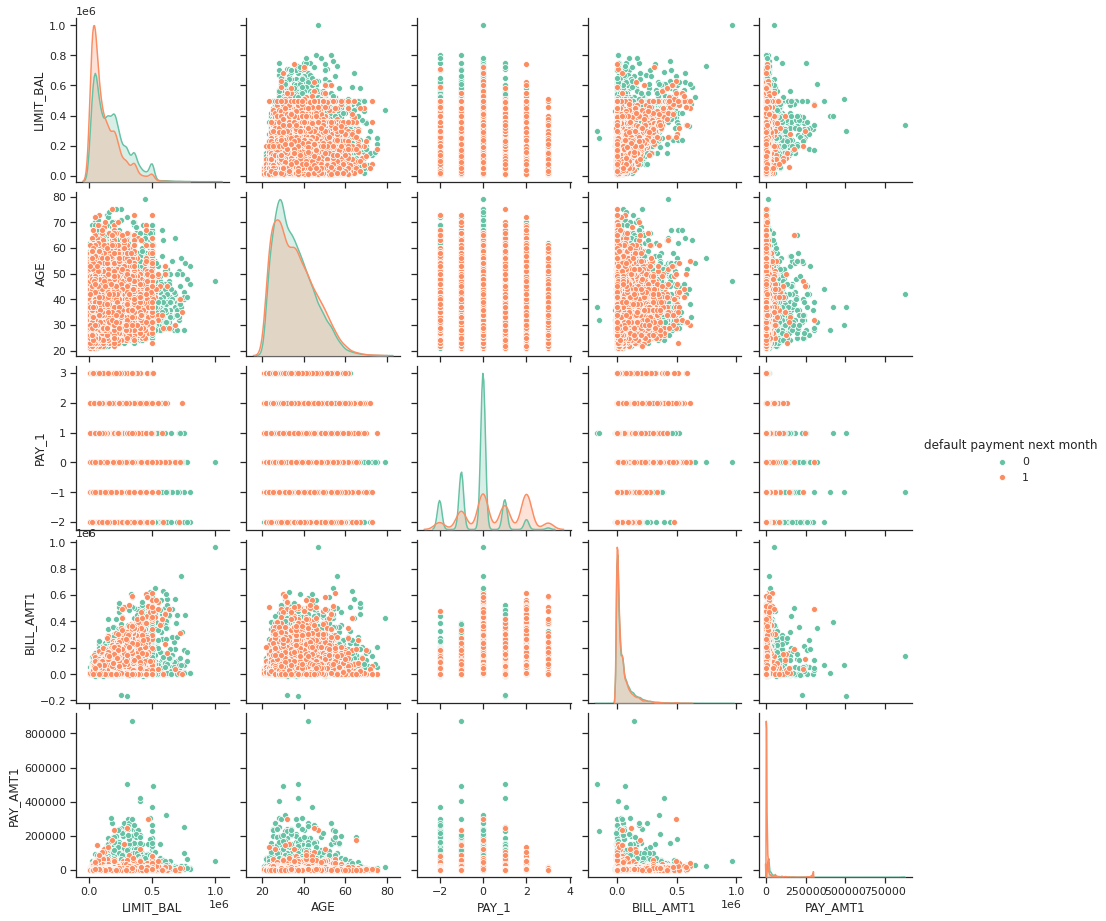

In [ ]:
df_credit_short = df_credit_num[[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
        'BILL_AMT1', 'PAY_AMT1',
       'default payment next month']]
sns.pairplot(df_credit_short,hue = 'default payment next month')

Adding last Bill amount and last Pay amount. Again people with higher limit Balance tend to default. People tend to make smaller payments in the last month before defaulting, which is probably an attempt to make some kind of payment before actually defaulting. 

Surprizing to see that people who are going to default next month also have lower bill

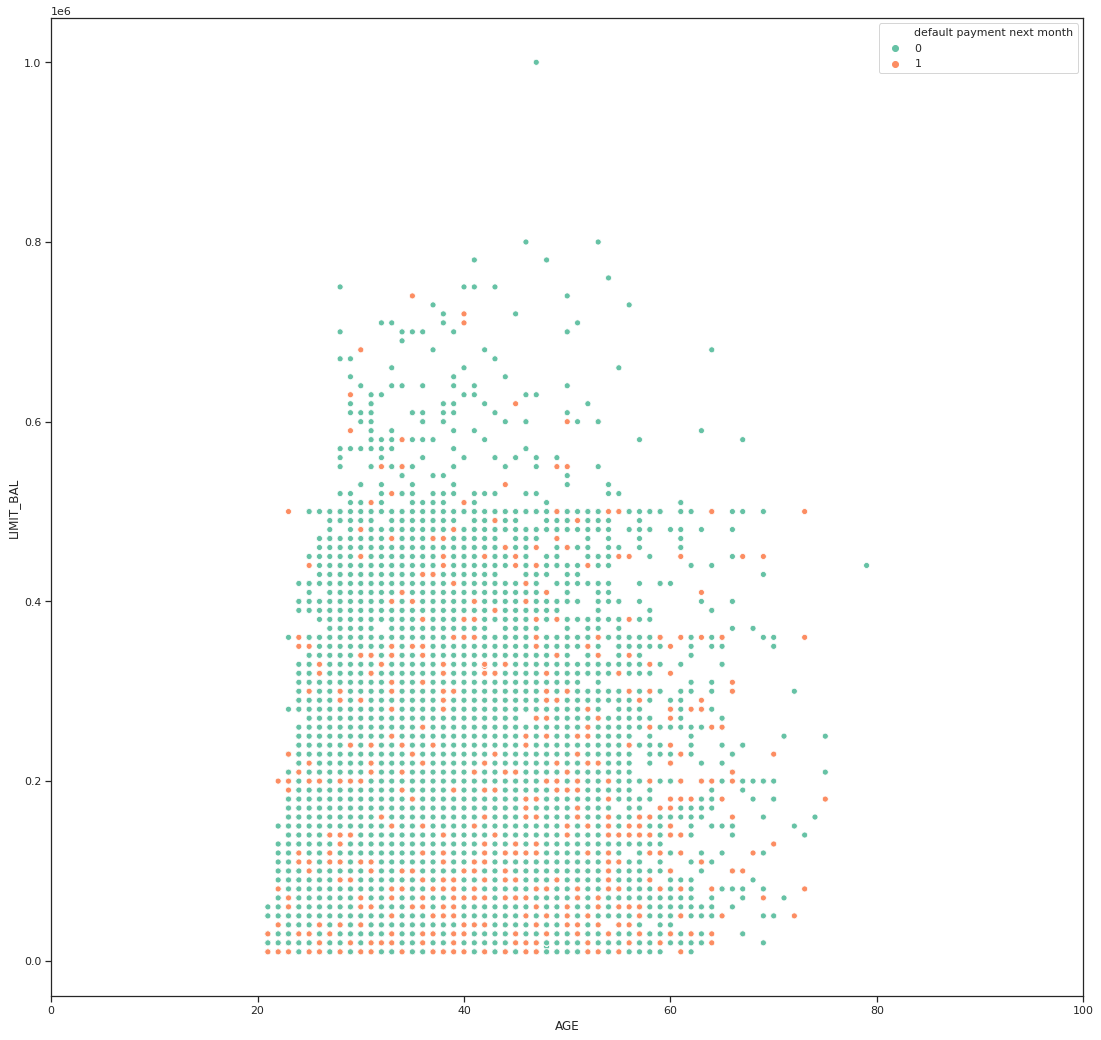

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))

axes.set_xlim(0, 100)
sns.scatterplot(x = df_credit['AGE'], y = df_credit['LIMIT_BAL'], hue = df_credit['default payment next month'], ax = axes, alpha = 1)

##Feature Engineering

In [ ]:
df_credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29473,29996,220000,Male,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29474,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29475,29998,30000,Male,University,Single,37,3,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29476,29999,80000,Male,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


###Percentage Paid

In [ ]:
for i in range(1,7):
  df_credit[f'PERCENTAGE_PAID_{i}'] = df_credit[[f'BILL_AMT{i}', f'PAY_AMT{i}']].apply(lambda x: 0 if (x[f'PAY_AMT{i}'] == 0) and (x[f'BILL_AMT{i}']!=0)
                                                                            else (100 if (x[f'PAY_AMT{i}'] == 0) or (x[f'BILL_AMT{i}']==0)
                                                                            else x[f'PAY_AMT{i}']*100/x[f'BILL_AMT{i}']),axis=1)

###Percentage of Payment Increase

In [ ]:
for i in range(1,6):
  df_credit[f'PERCENTAGE_PAY_INC_{i}'] = df_credit[[f'PAY_AMT{i+1}', f'PAY_AMT{i}']].apply(lambda x: 100 if x[f'PAY_AMT{i+1}'] == 0
                                                                            else (x[f'PAY_AMT{i}']-x[f'PAY_AMT{i+1}'])*100/x[f'PAY_AMT{i+1}'],axis=1)

###Percentage of Avaialable Credit Used

In [ ]:
for i in range(1,6):
  df_credit[f'PERCENTAGE_BAL_USED{i}'] = df_credit[[f'BILL_AMT{i}', 'LIMIT_BAL']].apply(lambda x: x[f'BILL_AMT{i}']*100/x['LIMIT_BAL'], axis=1)

In [ ]:
df_credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,PERCENTAGE_PAID_1,PERCENTAGE_PAID_2,PERCENTAGE_PAID_3,PERCENTAGE_PAID_4,PERCENTAGE_PAID_5,PERCENTAGE_PAID_6,PERCENTAGE_PAY_INC_1,PERCENTAGE_PAY_INC_2,PERCENTAGE_PAY_INC_3,PERCENTAGE_PAY_INC_4,PERCENTAGE_PAY_INC_5,PERCENTAGE_BAL_USED1,PERCENTAGE_BAL_USED2,PERCENTAGE_BAL_USED3,PERCENTAGE_BAL_USED4,PERCENTAGE_BAL_USED5
0,1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.000000,22.211476,0.000000,100.000000,100.000000,100.000000,-100.000000,100.000000,100.000000,100.000000,100.000000,19.565000,15.510000,3.445000,0.000000,0.000000
1,2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.000000,57.971014,37.285608,30.562347,0.000000,61.330880,-100.000000,0.000000,0.000000,100.000000,-100.000000,2.235000,1.437500,2.235000,2.726667,2.879167
2,3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,5.191696,10.693662,7.375175,6.977880,6.689858,32.156409,1.200000,50.000000,0.000000,0.000000,-80.000000,32.487778,15.585556,15.065556,15.923333,16.608889
3,4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,4.256225,4.185931,2.434522,3.885004,3.691426,3.384438,-0.941060,68.250000,9.090909,2.899906,6.900000,93.980000,96.466000,98.582000,56.628000,57.918000
4,5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,23.209934,646.931217,27.905679,42.979943,3.598663,3.549213,-94.547586,266.810000,11.111111,1206.240929,1.472754,17.234000,11.340000,71.670000,41.880000,38.292000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29473,29996,220000,Male,High School,Married,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,4.498592,10.372637,2.401075,3.462343,16.006659,6.257822,-57.500000,299.760144,64.194289,-39.060000,400.000000,85.885455,87.643182,94.711364,40.001818,14.198636
29474,29997,150000,Male,High School,Single,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,109.150327,192.888403,256.938892,1.436686,0.000000,100.000000,-47.901305,-60.813514,6875.193798,100.000000,100.000000,1.122000,1.218667,2.334667,5.986000,3.460000
29475,29998,30000,Male,University,Single,37,3,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0.000000,0.000000,797.679478,20.116869,9.717229,16.014878,100.000000,-100.000000,423.809524,110.000000,-35.483871,11.883333,11.186667,9.193333,69.593333,68.606667
29476,29999,80000,Male,High School,Married,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,-5221.884498,4.349379,1.543825,3.649524,446.765078,3.685845,2419.800528,189.388795,-38.836968,-96.363568,2835.920177,-2.056250,97.973750,95.380000,65.967500,14.818750


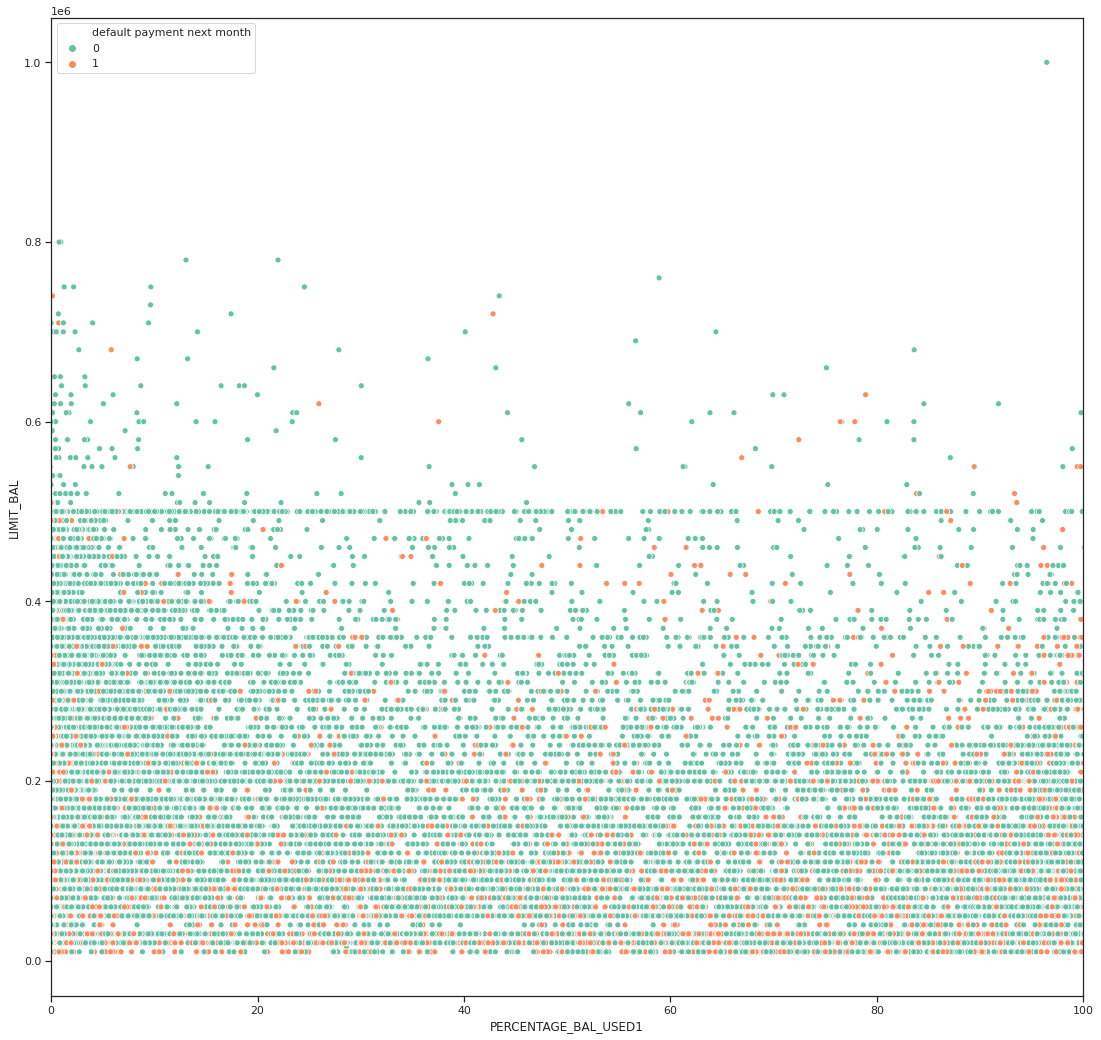

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))

axes.set_xlim(0, 100)
sns.scatterplot(x = df_credit['PERCENTAGE_BAL_USED1'], y = df_credit['LIMIT_BAL'], hue = df_credit['default payment next month'], ax = axes, alpha = 1)

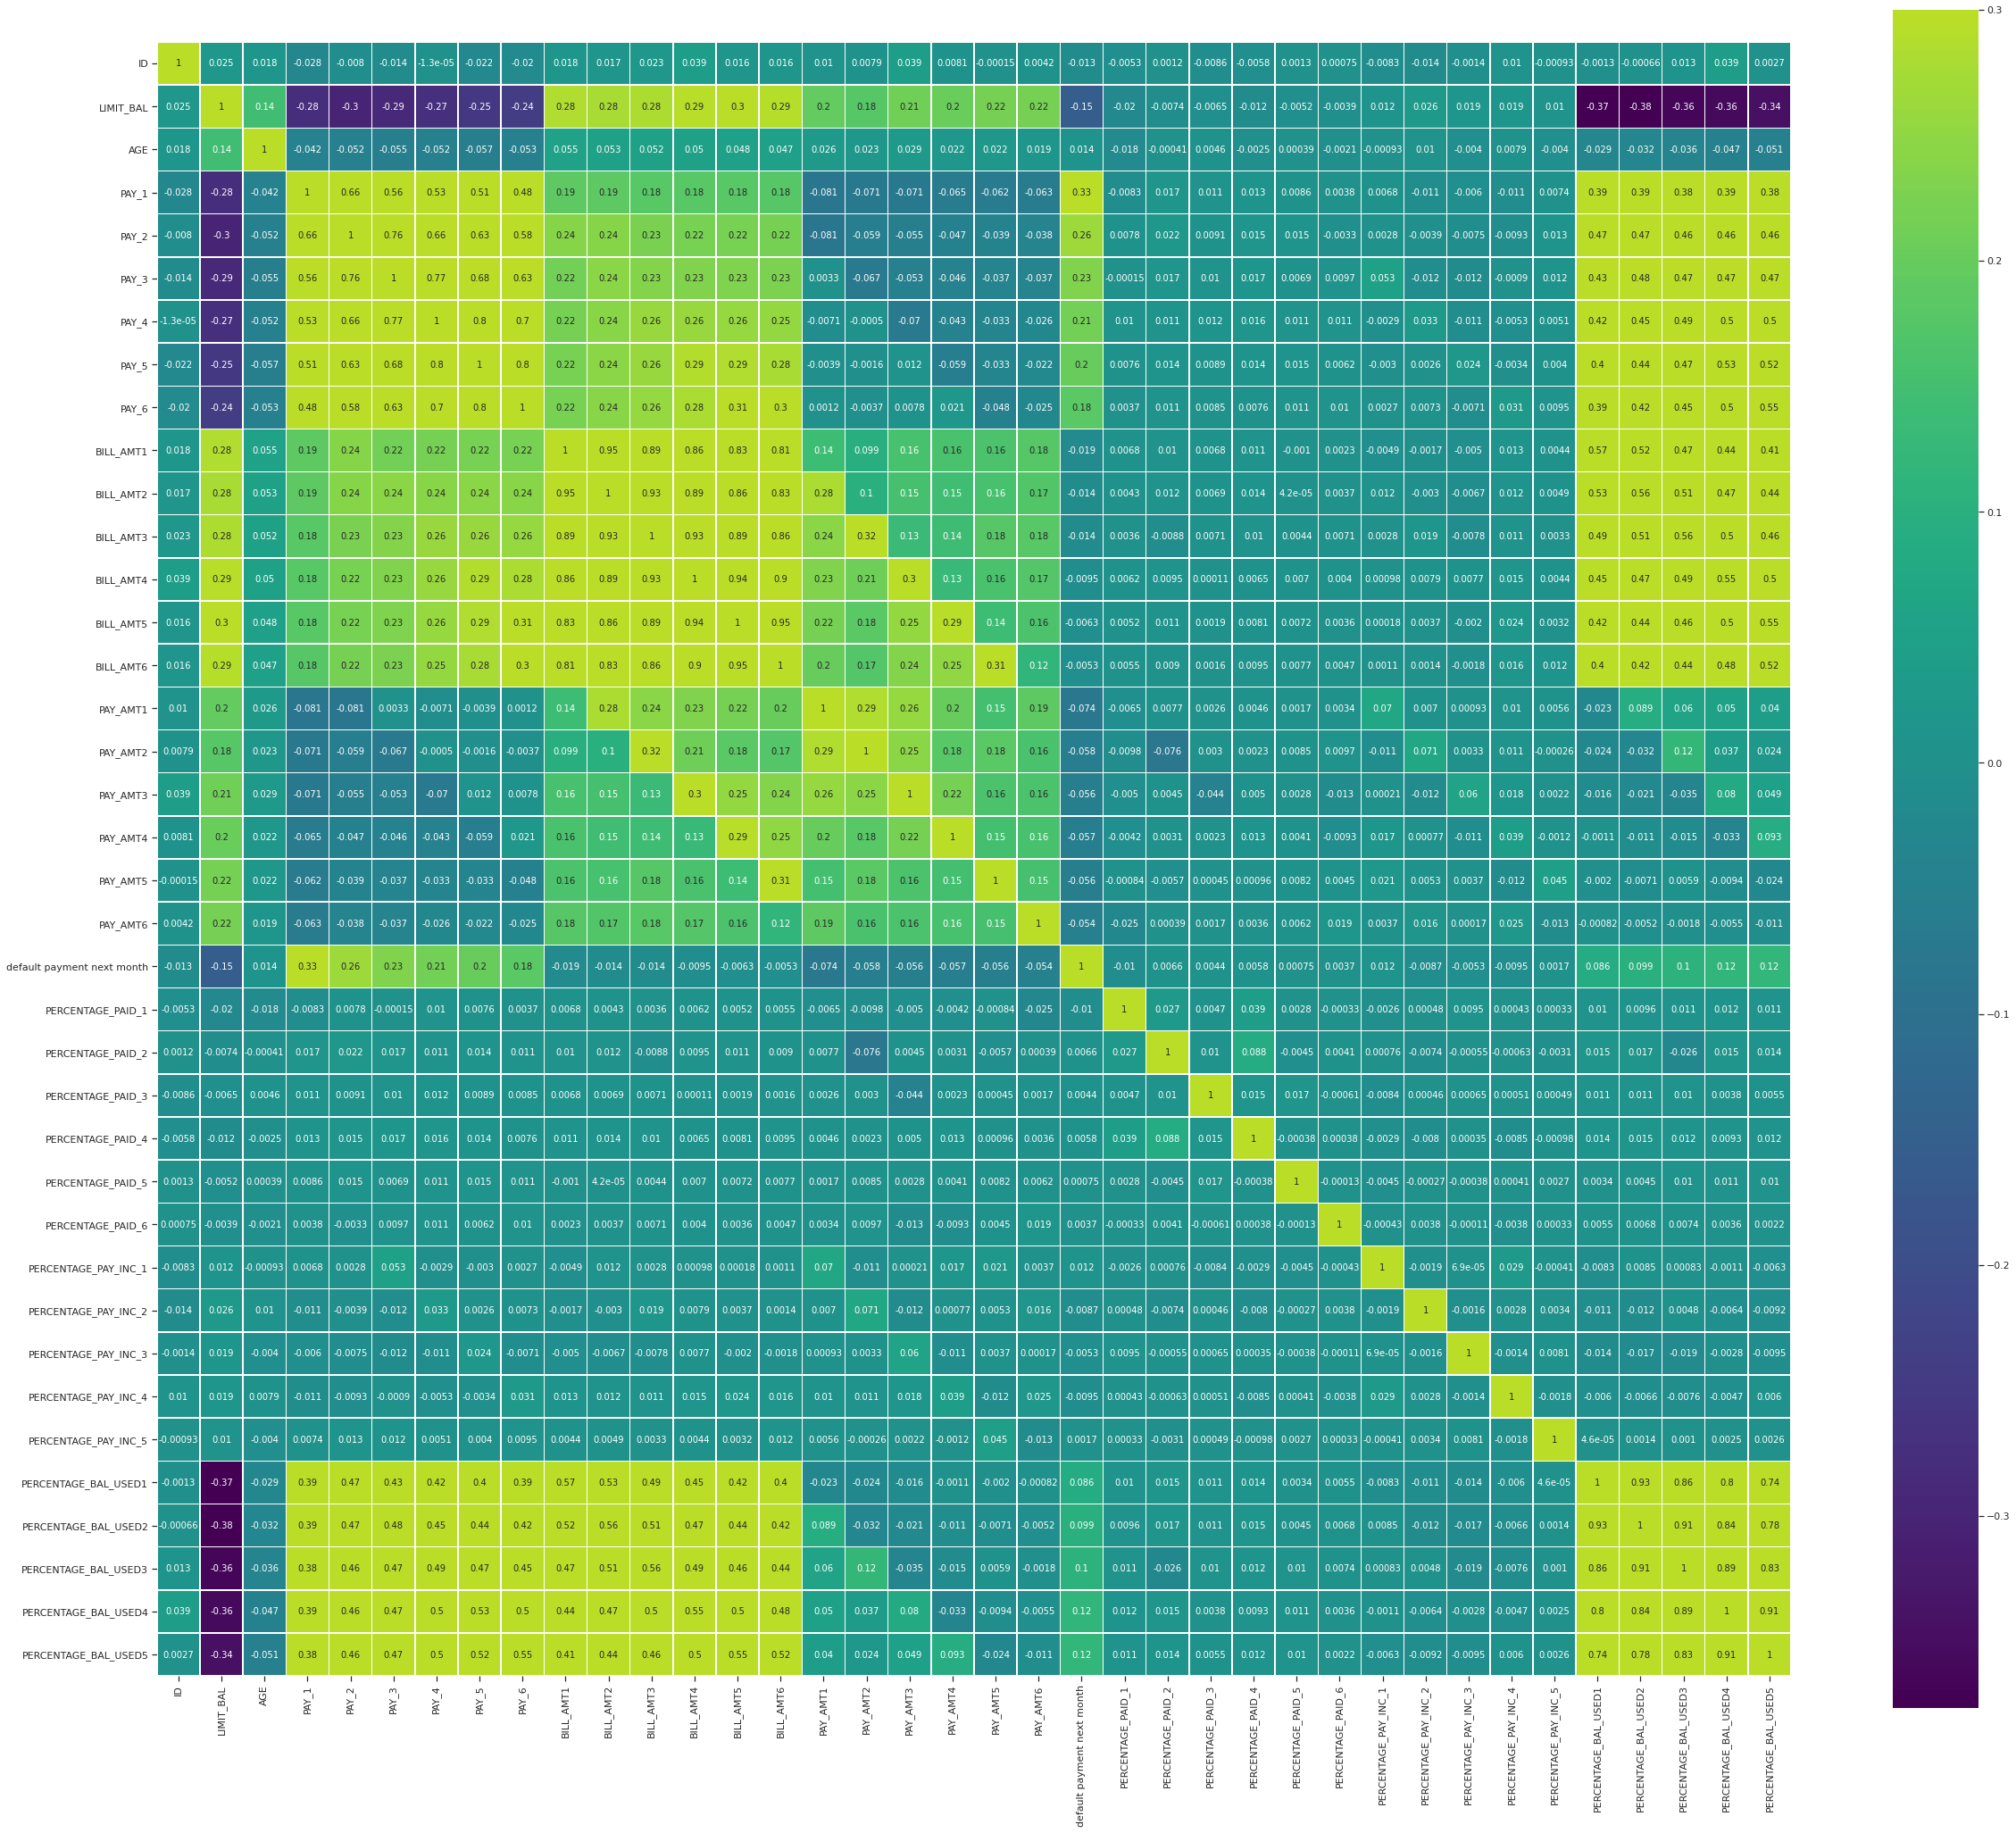

In [ ]:
# Compute the correlation matrix
dfa_corr = df_credit.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(41, 70))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(dfa_corr, cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [ ]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(dfa_corr, 10))


Top Absolute Correlations
PERCENTAGE_BAL_USED1  PERCENTAGE_BAL_USED2    0.996263
BILL_AMT1             BILL_AMT2               0.995866
BILL_AMT5             BILL_AMT6               0.994321
PERCENTAGE_BAL_USED4  PERCENTAGE_BAL_USED5    0.993169
BILL_AMT4             BILL_AMT5               0.993041
PERCENTAGE_BAL_USED2  PERCENTAGE_BAL_USED3    0.992243
PERCENTAGE_BAL_USED3  PERCENTAGE_BAL_USED4    0.990451
BILL_AMT3             BILL_AMT4               0.990101
BILL_AMT2             BILL_AMT3               0.989976
BILL_AMT4             BILL_AMT6               0.988624
dtype: float64


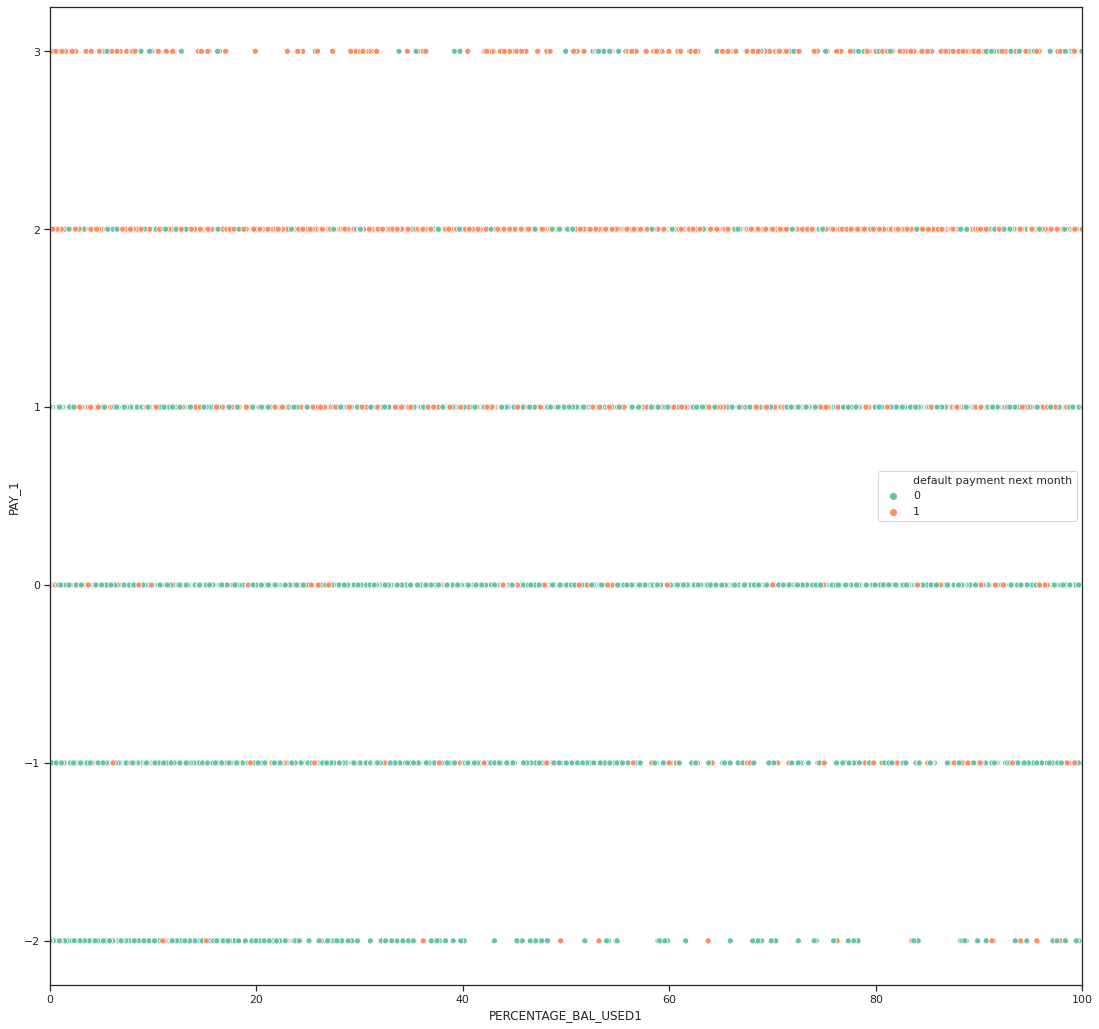

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))

axes.set_xlim(0, 100)
sns.scatterplot(x = df_credit['PERCENTAGE_BAL_USED1'], y = df_credit['PAY_1'], hue = df_credit['default payment next month'], ax = axes, alpha = 1)

##Data Pre-processing

In [ ]:
df_credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'PERCENTAGE_PAID_1', 'PERCENTAGE_PAID_2',
       'PERCENTAGE_PAID_3', 'PERCENTAGE_PAID_4', 'PERCENTAGE_PAID_5',
       'PERCENTAGE_PAID_6', 'PERCENTAGE_PAY_INC_1', 'PERCENTAGE_PAY_INC_2',
       'PERCENTAGE_PAY_INC_3', 'PERCENTAGE_PAY_INC_4', 'PERCENTAGE_PAY_INC_5',
       'PERCENTAGE_BAL_USED1', 'PERCENTAGE_BAL_USED2', 'PERCENTAGE_BAL_USED3',
       'PERCENTAGE_BAL_USED4', 'PERCENTAGE_BAL_USED5'],
      dtype='object')

In [ ]:
X_prep_col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PERCENTAGE_PAID_1', 'PERCENTAGE_PAID_2',
       'PERCENTAGE_PAID_3', 'PERCENTAGE_PAID_4', 'PERCENTAGE_PAID_5',
       'PERCENTAGE_PAID_6', 'PERCENTAGE_PAY_INC_1', 'PERCENTAGE_PAY_INC_2',
       'PERCENTAGE_PAY_INC_3', 'PERCENTAGE_PAY_INC_4', 'PERCENTAGE_PAY_INC_5',
       'PERCENTAGE_BAL_USED1', 'PERCENTAGE_BAL_USED2', 'PERCENTAGE_BAL_USED3',
       'PERCENTAGE_BAL_USED4', 'PERCENTAGE_BAL_USED5']

##Pre-processing

In [ ]:
X_prep = df_credit[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PERCENTAGE_PAID_1', 'PERCENTAGE_PAID_2',
       'PERCENTAGE_PAID_3', 'PERCENTAGE_PAID_4', 'PERCENTAGE_PAID_5',
       'PERCENTAGE_PAID_6', 'PERCENTAGE_PAY_INC_1', 'PERCENTAGE_PAY_INC_2',
       'PERCENTAGE_PAY_INC_3', 'PERCENTAGE_PAY_INC_4', 'PERCENTAGE_PAY_INC_5',
       'PERCENTAGE_BAL_USED1', 'PERCENTAGE_BAL_USED2', 'PERCENTAGE_BAL_USED3',
       'PERCENTAGE_BAL_USED4', 'PERCENTAGE_BAL_USED5', 'default payment next month']]



###Encoding labels

In [ ]:
# "sex" dummies

# Get one hot encoding of columns
one_hot = pd.get_dummies(X_prep['SEX'])
# Drop column B as it is now encoded
X_prep = X_prep.drop('SEX',axis = 1)
# Join the encoded df
X_prep = X_prep.join(one_hot)
# avoid dummy variable trap
X_prep = X_prep.drop('Male',axis = 1)  


# "education" dummies

# Get one hot encoding of columns
one_hot = pd.get_dummies(X_prep['EDUCATION'])
# Drop column B as it is now encoded
X_prep = X_prep.drop('EDUCATION',axis = 1)
# Join the encoded df
X_prep = X_prep.join(one_hot)
# avoid dummy variable trap
X_prep = X_prep.drop('High School',axis = 1) 

# "marriage" dummies

# Get one hot encoding of columns
one_hot = pd.get_dummies(X_prep['MARRIAGE'])
# Drop column B as it is now encoded
X_prep = X_prep.drop('MARRIAGE',axis = 1)
# Join the encoded df
X_prep = X_prep.join(one_hot)
# avoid dummy variable trap
X_prep = X_prep.drop('Neither',axis = 1) 

In [ ]:
"""
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_prep)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
lab = pd.DataFrame(data=y)
finalDf = pd.concat([principalDf, lab[0]], axis = 1)
"""

"\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(X_prep)\nprincipalDf = pd.DataFrame(data = principalComponents\n             , columns = ['principal component 1', 'principal component 2'])\nlab = pd.DataFrame(data=y)\nfinalDf = pd.concat([principalDf, lab[0]], axis = 1)\n"

In [ ]:
"""
fig = plt.figure(figsize = (28,28))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[0] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 10)
ax.legend(targets)
ax.grid()
"""

"\nfig = plt.figure(figsize = (28,28))\nax = fig.add_subplot(1,1,1) \nax.set_xlabel('Principal Component 1', fontsize = 15)\nax.set_ylabel('Principal Component 2', fontsize = 15)\nax.set_title('2 component PCA', fontsize = 20)\ntargets = [0, 1]\ncolors = ['r', 'g']\nfor target, color in zip(targets,colors):\n    indicesToKeep = finalDf[0] == target\n    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']\n               , finalDf.loc[indicesToKeep, 'principal component 2']\n               , c = color\n               , s = 10)\nax.legend(targets)\nax.grid()\n"

In [ ]:
#%% feature scaling

SC_X = StandardScaler()
#SC_y = StandardScaler()
X_prep_1 = SC_X.fit_transform(X_prep)
#y = SC_y.fit_transform(np.array(y).reshape(len(y),1))

In [ ]:
X_prep_df = pd.DataFrame(X_prep_1, index=range(0, X_prep.shape[0]), columns=X_prep.columns)
X_prep_df = X_prep_df.rename(columns={"default payment next month": "default payment next month_scaled"})
X_prep_df['default payment next month'] = X_prep['default payment next month']
X_prep_df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,PERCENTAGE_PAID_1,PERCENTAGE_PAID_2,PERCENTAGE_PAID_3,PERCENTAGE_PAID_4,PERCENTAGE_PAID_5,PERCENTAGE_PAID_6,PERCENTAGE_PAY_INC_1,PERCENTAGE_PAY_INC_2,PERCENTAGE_PAY_INC_3,PERCENTAGE_PAY_INC_4,PERCENTAGE_PAY_INC_5,PERCENTAGE_BAL_USED1,PERCENTAGE_BAL_USED2,PERCENTAGE_BAL_USED3,PERCENTAGE_BAL_USED4,PERCENTAGE_BAL_USED5,default payment next month_scaled,Female,Graduate School,University,Married,Single,default payment next month
0,-1.133563,-1.244592,1.865908,1.832203,-0.714521,-0.690263,-1.594183,-1.542233,-0.641214,-0.646452,-0.667249,-0.671717,-0.663046,-0.653119,-0.340591,-0.225117,-0.295459,-0.306874,-0.314159,-0.293220,0.009386,0.017908,0.010272,0.015738,0.024251,0.017983,-0.046887,-0.037194,-0.032983,-0.033091,-0.033921,-0.553766,-0.633234,-0.903096,-0.976861,-0.953620,1.862181,0.811474,-0.748285,1.049747,1.093505,-1.070241,1
1,-0.364148,-1.027590,-0.901597,1.832203,0.147854,0.205317,0.253366,2.079583,-0.657998,-0.665868,-0.638416,-0.620767,-0.606149,-0.598349,-0.340591,-0.211661,-0.238403,-0.243306,-0.314159,-0.180118,0.009386,0.021302,0.010886,0.011007,0.009051,0.013220,-0.046887,-0.040698,-0.035810,-0.033091,-0.049376,-0.976349,-0.982133,-0.933668,-0.902763,-0.871324,1.862181,0.811474,-0.748285,1.049747,-0.914490,0.934369,1
2,-0.594973,-0.159582,0.020905,0.118045,0.147854,0.205317,0.253366,0.268675,-0.295909,-0.492407,-0.481057,-0.448561,-0.416880,-0.391965,-0.249090,-0.190028,-0.238403,-0.243306,-0.248573,-0.010466,0.009608,0.016816,0.010393,0.009400,0.010068,0.009627,-0.042381,-0.038946,-0.035810,-0.038087,-0.047830,-0.238650,-0.631361,-0.609490,-0.544140,-0.478880,-0.537005,0.811474,-0.748285,1.049747,-0.914490,0.934369,0
3,-0.902738,0.165921,0.020905,0.118045,0.147854,0.205317,0.253366,0.268675,-0.053885,-0.010096,0.035881,-0.230823,-0.186144,-0.156862,-0.220036,-0.167573,-0.226992,-0.236949,-0.244048,-0.236669,0.009568,0.016198,0.010312,0.009189,0.009613,0.006083,-0.042477,-0.038306,-0.035553,-0.037942,-0.041115,1.260809,1.373902,1.500647,0.562022,0.701881,-0.537005,0.811474,-0.748285,1.049747,1.093505,-1.070241,0
4,-0.902738,2.335940,-0.901597,0.118045,-0.714521,0.205317,0.253366,0.268675,-0.577078,-0.610242,-0.158788,-0.345648,-0.347746,-0.331804,-0.220036,1.332132,0.275099,0.265236,-0.268970,-0.254822,0.010381,0.077189,0.010731,0.011853,0.009598,0.006103,-0.046644,-0.031348,-0.035496,0.022170,-0.041534,-0.610606,-0.736621,0.820685,0.161241,0.140900,-0.537005,-1.232325,-0.748285,1.049747,1.093505,-1.070241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29473,0.405266,0.382922,0.020905,0.118045,0.147854,0.205317,0.253366,0.268675,1.881629,2.028538,2.337221,0.698644,-0.148629,-0.384726,0.171767,0.610403,-0.010009,-0.113183,0.013770,-0.236669,0.009579,0.016785,0.010311,0.009161,0.011484,0.006437,-0.044994,-0.030194,-0.033995,-0.040038,-0.010738,1.063427,1.155159,1.402851,0.110201,-0.547773,-0.537005,-1.232325,-0.748285,-0.952611,1.093505,-1.070241,0
29474,-0.133324,0.816926,-0.901597,-0.739034,-0.714521,-0.690263,0.253366,0.268675,-0.671619,-0.664415,-0.626553,-0.531900,-0.577576,-0.653119,-0.229862,-0.102370,0.217929,-0.298673,-0.314159,-0.293220,0.014067,0.034104,0.014502,0.009023,0.009051,0.017983,-0.044567,-0.042829,0.158602,-0.033091,-0.033921,-1.003489,-0.987558,-0.931150,-0.814190,-0.854721,-0.537005,-1.232325,-0.748285,-0.952611,-0.914490,0.934369,0
29475,-1.056621,0.165921,2.788410,2.689282,1.872603,-0.690263,0.253366,0.268675,-0.645959,-0.642870,-0.637316,-0.346614,-0.324098,-0.328008,-0.340591,-0.254928,0.959768,-0.039889,-0.182987,-0.117912,0.009386,0.015801,0.023406,0.010295,0.010528,0.007638,-0.037983,-0.044202,-0.023826,-0.032592,-0.044390,-0.741079,-0.740422,-0.757858,0.914359,1.007401,1.862181,-1.232325,-0.7482

###Train and Test

In [ ]:
X_prep_df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PERCENTAGE_PAID_1',
       'PERCENTAGE_PAID_2', 'PERCENTAGE_PAID_3', 'PERCENTAGE_PAID_4',
       'PERCENTAGE_PAID_5', 'PERCENTAGE_PAID_6', 'PERCENTAGE_PAY_INC_1',
       'PERCENTAGE_PAY_INC_2', 'PERCENTAGE_PAY_INC_3', 'PERCENTAGE_PAY_INC_4',
       'PERCENTAGE_PAY_INC_5', 'PERCENTAGE_BAL_USED1', 'PERCENTAGE_BAL_USED2',
       'PERCENTAGE_BAL_USED3', 'PERCENTAGE_BAL_USED4', 'PERCENTAGE_BAL_USED5',
       'default payment next month_scaled', 'Female', 'Graduate School',
       'University', 'Married', 'Single', 'default payment next month'],
      dtype='object')

In [ ]:
y = X_prep_df[['default payment next month']]
X = X_prep_df.drop(['default payment next month', 'default payment next month_scaled'], axis = 1)

y = np.array(y)

In [ ]:
X.shape

(29478, 41)

In [ ]:
y.shape

(29478, 1)

In [ ]:

# Train set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [ ]:
clas_accur = pd.DataFrame(columns=['Model Name', 'Matthew_Corr_Coef', 'f1', 'Accuracy'])

##Building Models All Features

###Logistic Regression

In [ ]:
model_name = 'Logistic Regression (all feat)'

In [ ]:
LR_classifier = LogisticRegression(random_state = 0, solver = 'liblinear')
LR_classifier.fit(X_train, y_train)

# predictions 
y_pred = LR_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7375  238]
 [1600  613]]


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7613
           1       0.72      0.28      0.40      2213

    accuracy                           0.81      9826
   macro avg       0.77      0.62      0.64      9826
weighted avg       0.80      0.81      0.78      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)

In [ ]:
clas_accur

,Model Name,Matthew_Corr_Coef,f1,Accuracy
0,Logistic Regression (all feat),0.36497,0.77905,0.812945


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)

axes.set_xlim(20, 80)
axes.set_title(model_name)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""


'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\n\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###K-Nearest Neighbors

In [ ]:
model_name = 'K-Nearest Neighbors (all feat)'


In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2)
KNN_classifier.fit(X_train, y_train)

# predictions 
y_pred = KNN_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7291  322]
 [1653  560]]


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7613
           1       0.63      0.25      0.36      2213

    accuracy                           0.80      9826
   macro avg       0.73      0.61      0.62      9826
weighted avg       0.77      0.80      0.76      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
'''
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
'''

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Support Vector Machines (SVM)

In [ ]:
model_name = 'Support Vector Machines (all feat)'


In [ ]:
SVM_classifier = SVC(kernel = 'rbf', random_state = 0, )
SVM_classifier.fit(X_train, y_train)

# predictions 
y_pred = SVM_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7296  317]
 [1436  777]]


              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7613
           1       0.71      0.35      0.47      2213

    accuracy                           0.82      9826
   macro avg       0.77      0.65      0.68      9826
weighted avg       0.81      0.82      0.80      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)

"""


'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n\n'

###Naive Bayes

In [ ]:
model_name = 'Naive Bayes (all feat)'


In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# predictions 
y_pred = NB_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[ 794 6819]
 [  97 2116]]


              precision    recall  f1-score   support

           0       0.89      0.10      0.19      7613
           1       0.24      0.96      0.38      2213

    accuracy                           0.30      9826
   macro avg       0.56      0.53      0.28      9826
weighted avg       0.74      0.30      0.23      9826



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Decision Tree

In [ ]:
model_name = 'Decision Tree (all feat)'


In [ ]:
DT_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth= 5)
DT_classifier.fit(X_train, y_train)

# predictions 
y_pred = DT_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[7266  347]
 [1424  789]]


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7613
           1       0.69      0.36      0.47      2213

    accuracy                           0.82      9826
   macro avg       0.77      0.66      0.68      9826
weighted avg       0.80      0.82      0.80      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Random Forest

In [ ]:
model_name = 'Random Forest (all feat)'


In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

# predictions 
y_pred = RF_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[[7187  426]
 [1376  837]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7613
           1       0.66      0.38      0.48      2213

    accuracy                           0.82      9826
   macro avg       0.75      0.66      0.69      9826
weighted avg       0.80      0.82      0.80      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

In [ ]:
print(roc_auc_score(y_test, y_pred))

0.6611313477926697


In [ ]:

importances = RF_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_classifier.estimators_],
             axis=0)
             
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"%d. {X_train.columns[indices[f]]} feat#(%d) (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. PAY_1 feat#(2) (0.070804)
2. AGE feat#(1) (0.044501)
3. LIMIT_BAL feat#(0) (0.038067)
4. PERCENTAGE_BAL_USED1 feat#(31) (0.036188)
5. PERCENTAGE_BAL_USED2 feat#(32) (0.033301)
6. BILL_AMT1 feat#(8) (0.032887)
7. PERCENTAGE_BAL_USED3 feat#(33) (0.030658)
8. PERCENTAGE_BAL_USED4 feat#(34) (0.029644)
9. PAY_2 feat#(3) (0.029589)
10. PERCENTAGE_BAL_USED5 feat#(35) (0.029293)
11. PAY_AMT1 feat#(14) (0.028075)
12. BILL_AMT2 feat#(9) (0.027988)
13. PERCENTAGE_PAID_1 feat#(20) (0.027408)
14. BILL_AMT3 feat#(10) (0.026779)
15. PERCENTAGE_PAID_2 feat#(21) (0.025987)
16. BILL_AMT6 feat#(13) (0.025750)
17. PAY_AMT2 feat#(15) (0.025566)
18. BILL_AMT4 feat#(11) (0.025555)
19. BILL_AMT5 feat#(12) (0.025159)
20. PAY_AMT6 feat#(19) (0.024667)
21. PAY_AMT3 feat#(16) (0.024331)
22. PERCENTAGE_PAID_6 feat#(25) (0.023920)
23. PERCENTAGE_PAID_3 feat#(22) (0.023644)
24. PAY_AMT4 feat#(17) (0.023291)
25. PERCENTAGE_PAID_5 feat#(24) (0.023280)
26. PERCENTAGE_PAY_INC_1 feat#(26) (0.022892)
2

In [ ]:
X_5_feat = []
X_10_feat = []
X_15_feat = []
X_20_feat = []

for i in [5,10,15,20]:
  print(f'Sum of First {i} features explain {round(sum(importances[indices[0:i]])*100)}% of data')
  print('\tFeatures are:')
  for feat in range(i):
    print(f'\t\t{X_train.columns[indices[feat]]}')
    if i== 5:
      X_5_feat.append(X_train.columns[indices[feat]])
    if i== 10:
      X_10_feat.append(X_train.columns[indices[feat]])
    if i== 15:
      X_15_feat.append(X_train.columns[indices[feat]])
    if i== 20:
      X_20_feat.append(X_train.columns[indices[feat]])

Sum of First 5 features explain 22.0% of data
	Features are:
		PAY_1
		AGE
		LIMIT_BAL
		PERCENTAGE_BAL_USED1
		PERCENTAGE_BAL_USED2
Sum of First 10 features explain 37.0% of data
	Features are:
		PAY_1
		AGE
		LIMIT_BAL
		PERCENTAGE_BAL_USED1
		PERCENTAGE_BAL_USED2
		BILL_AMT1
		PERCENTAGE_BAL_USED3
		PERCENTAGE_BAL_USED4
		PAY_2
		PERCENTAGE_BAL_USED5
Sum of First 15 features explain 51.0% of data
	Features are:
		PAY_1
		AGE
		LIMIT_BAL
		PERCENTAGE_BAL_USED1
		PERCENTAGE_BAL_USED2
		BILL_AMT1
		PERCENTAGE_BAL_USED3
		PERCENTAGE_BAL_USED4
		PAY_2
		PERCENTAGE_BAL_USED5
		PAY_AMT1
		BILL_AMT2
		PERCENTAGE_PAID_1
		BILL_AMT3
		PERCENTAGE_PAID_2
Sum of First 20 features explain 64.0% of data
	Features are:
		PAY_1
		AGE
		LIMIT_BAL
		PERCENTAGE_BAL_USED1
		PERCENTAGE_BAL_USED2
		BILL_AMT1
		PERCENTAGE_BAL_USED3
		PERCENTAGE_BAL_USED4
		PAY_2
		PERCENTAGE_BAL_USED5
		PAY_AMT1
		BILL_AMT2
		PERCENTAGE_PAID_1
		BILL_AMT3
		PERCENTAGE_PAID_2
		BILL_AMT6
		PAY_AMT2
		BILL_AMT4
		BILL_AMT5
	

##Building Models 5 Features

In [ ]:
X_train_full = X_train
X_test_full = X_test

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_prep[X_5_feat], y, test_size=1/3, random_state=0)
X_train = X_train_full[X_5_feat]
X_test = X_test_full[X_5_feat]

###Logistic Regression

In [ ]:
model_name = 'Logistic Regression (5 feat)'


In [ ]:
LR_classifier = LogisticRegression(random_state = 0, solver = 'liblinear')
LR_classifier.fit(X_train, y_train)

# predictions 
y_pred = LR_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[7382  231]
 [1586  627]]


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7613
           1       0.73      0.28      0.41      2213

    accuracy                           0.82      9826
   macro avg       0.78      0.63      0.65      9826
weighted avg       0.80      0.82      0.78      9826



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###K-Nearest Neighbors

In [ ]:
model_name = 'K-Nearest Neighbors (5 feat)'


In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2)
KNN_classifier.fit(X_train, y_train)

# predictions 
y_pred = KNN_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7265  348]
 [1523  690]]


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7613
           1       0.66      0.31      0.42      2213

    accuracy                           0.81      9826
   macro avg       0.75      0.63      0.66      9826
weighted avg       0.79      0.81      0.78      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
'''
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
'''

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Support Vector Machines (SVM)

In [ ]:
model_name = 'Support Vector Machines (5 feat)'


In [ ]:
SVM_classifier = SVC(kernel = 'rbf', random_state = 0, )
SVM_classifier.fit(X_train, y_train)

# predictions 
y_pred = SVM_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7328  285]
 [1448  765]]


              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7613
           1       0.73      0.35      0.47      2213

    accuracy                           0.82      9826
   macro avg       0.78      0.65      0.68      9826
weighted avg       0.81      0.82      0.80      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted'), 'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred)}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Naive Bayes

In [ ]:
model_name = 'Naive Bayes (5 feat)'


In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# predictions 
y_pred = NB_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[7181  432]
 [1382  831]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7613
           1       0.66      0.38      0.48      2213

    accuracy                           0.82      9826
   macro avg       0.75      0.66      0.68      9826
weighted avg       0.80      0.82      0.80      9826



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted'), 'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred)}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Decision Tree

In [ ]:
model_name = 'Decision Tree (5 feat)'


In [ ]:
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train, y_train)

# predictions 
y_pred = DT_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[6241 1372]
 [1371  842]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7613
           1       0.38      0.38      0.38      2213

    accuracy                           0.72      9826
   macro avg       0.60      0.60      0.60      9826
weighted avg       0.72      0.72      0.72      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Random Forest

In [ ]:
model_name = 'Random Forest (5 feat)'


In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

# predictions 
y_pred = RF_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[[7088  525]
 [1400  813]]


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7613
           1       0.61      0.37      0.46      2213

    accuracy                           0.80      9826
   macro avg       0.72      0.65      0.67      9826
weighted avg       0.78      0.80      0.79      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

In [ ]:
clas_accur

,Model Name,Matthew_Corr_Coef,f1,Accuracy
0,Logistic Regression (all feat),0.364970,0.779050,0.812945
1,K-Nearest Neighbors (all feat),0.307996,0.763862,0.799003
2,Support Vector Machines (all feat),0.410978,0.797519,0.821596
3,Naive Bayes (all feat),0.087958,0.230177,0.296153
4,Decision Tree (all feat),0.406218,0.796736,0.819764
5,Random Forest (all feat),0.402220,0.796934,0.816609
6,Logistic Regression (5 feat),0.374342,0.781843,0.815082
7,K-Nearest Neighbors (5 feat),0.361611,0.781997,0.809587
8,Support Vector Machines (5 feat),0.416799,0.798458,0.823631
9,Naive Bayes (5 feat),0.397853,0.795581,0.815388


##Building Models 10 Features

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_prep[X_10_feat], y, test_size=1/3, random_state=0)
X_train = X_train_full[X_10_feat]
X_test = X_test_full[X_10_feat]

###Logistic Regression

In [ ]:
model_name = 'Logistic Regression (10 feat)'


In [ ]:
LR_classifier = LogisticRegression(random_state = 0, solver = 'liblinear')
LR_classifier.fit(X_train, y_train)

# predictions 
y_pred = LR_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[7384  229]
 [1602  611]]


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7613
           1       0.73      0.28      0.40      2213

    accuracy                           0.81      9826
   macro avg       0.77      0.62      0.64      9826
weighted avg       0.80      0.81      0.78      9826



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###K-Nearest Neighbors

In [ ]:
model_name = 'K-Nearest Neighbors (10 feat)'


In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2)
KNN_classifier.fit(X_train, y_train)

# predictions 
y_pred = KNN_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7245  368]
 [1513  700]]


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7613
           1       0.66      0.32      0.43      2213

    accuracy                           0.81      9826
   macro avg       0.74      0.63      0.66      9826
weighted avg       0.79      0.81      0.78      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Support Vector Machines (SVM)

In [ ]:
model_name = 'Support Vector Machines (10 feat)'


In [ ]:
SVM_classifier = SVC(kernel = 'rbf', random_state = 0, )
SVM_classifier.fit(X_train, y_train)

# predictions 
y_pred = SVM_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7340  273]
 [1455  758]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7613
           1       0.74      0.34      0.47      2213

    accuracy                           0.82      9826
   macro avg       0.78      0.65      0.68      9826
weighted avg       0.81      0.82      0.80      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Naive Bayes

In [ ]:
model_name = 'Naive Bayes (10 feat)'


In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# predictions 
y_pred = NB_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[6419 1194]
 [1128 1085]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7613
           1       0.48      0.49      0.48      2213

    accuracy                           0.76      9826
   macro avg       0.66      0.67      0.66      9826
weighted avg       0.77      0.76      0.76      9826



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Decision Tree

In [ ]:
model_name = 'Decision Tree (10 feat)'


In [ ]:
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=10)
DT_classifier.fit(X_train, y_train)

# predictions 
y_pred = DT_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[7146  467]
 [1377  836]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7613
           1       0.64      0.38      0.48      2213

    accuracy                           0.81      9826
   macro avg       0.74      0.66      0.68      9826
weighted avg       0.79      0.81      0.79      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Random Forest

In [ ]:
model_name = 'Random Forest (10 feat)'


In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

# predictions 
y_pred = RF_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[[7162  451]
 [1401  812]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7613
           1       0.64      0.37      0.47      2213

    accuracy                           0.81      9826
   macro avg       0.74      0.65      0.68      9826
weighted avg       0.79      0.81      0.79      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

##Building Models 15 Features

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_prep[X_15_feat], y, test_size=1/3, random_state=0)
X_train = X_train_full[X_15_feat]
X_test = X_test_full[X_15_feat]

###Logistic Regression

In [ ]:
model_name = 'Logistic Regression (15 feat)'


In [ ]:
LR_classifier = LogisticRegression(random_state = 0, solver = 'liblinear')
LR_classifier.fit(X_train, y_train)

# predictions 
y_pred = LR_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[7378  235]
 [1601  612]]


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7613
           1       0.72      0.28      0.40      2213

    accuracy                           0.81      9826
   macro avg       0.77      0.62      0.64      9826
weighted avg       0.80      0.81      0.78      9826



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###K-Nearest Neighbors

In [ ]:
model_name = 'K-Nearest Neighbors (15 feat)'


In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2)
KNN_classifier.fit(X_train, y_train)

# predictions 
y_pred = KNN_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7269  344]
 [1507  706]]


              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7613
           1       0.67      0.32      0.43      2213

    accuracy                           0.81      9826
   macro avg       0.75      0.64      0.66      9826
weighted avg       0.79      0.81      0.78      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Support Vector Machines (SVM)

In [ ]:
model_name = 'Support Vector Machines (15 feat)'


In [ ]:
SVM_classifier = SVC(kernel = 'rbf', random_state = 0, )
SVM_classifier.fit(X_train, y_train)

# predictions 
y_pred = SVM_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7343  270]
 [1461  752]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7613
           1       0.74      0.34      0.46      2213

    accuracy                           0.82      9826
   macro avg       0.78      0.65      0.68      9826
weighted avg       0.81      0.82      0.80      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Naive Bayes

In [ ]:
model_name = 'Naive Bayes (15 feat)'


In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# predictions 
y_pred = NB_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[5922 1691]
 [ 995 1218]]


              precision    recall  f1-score   support

           0       0.86      0.78      0.82      7613
           1       0.42      0.55      0.48      2213

    accuracy                           0.73      9826
   macro avg       0.64      0.66      0.65      9826
weighted avg       0.76      0.73      0.74      9826



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Decision Tree

In [ ]:
model_name = 'Decision Tree (15 feat)'


In [ ]:
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train, y_train)

# predictions 
y_pred = DT_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[6244 1369]
 [1352  861]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7613
           1       0.39      0.39      0.39      2213

    accuracy                           0.72      9826
   macro avg       0.60      0.60      0.60      9826
weighted avg       0.72      0.72      0.72      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Random Forest

In [ ]:
model_name = 'Random Forest (15 feat)'


In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

# predictions 
y_pred = RF_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[[7167  446]
 [1380  833]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7613
           1       0.65      0.38      0.48      2213

    accuracy                           0.81      9826
   macro avg       0.74      0.66      0.68      9826
weighted avg       0.80      0.81      0.79      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

##Building Models 20 Features

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_prep[X_20_feat], y, test_size=1/3, random_state=0)
X_train = X_train_full[X_20_feat]
X_test = X_test_full[X_20_feat]

###Logistic Regression

In [ ]:
model_name = 'Logistic Regression (20 feat)'


In [ ]:
LR_classifier = LogisticRegression(random_state = 0, solver = 'liblinear')
LR_classifier.fit(X_train, y_train)

# predictions 
y_pred = LR_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[7379  234]
 [1600  613]]


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7613
           1       0.72      0.28      0.40      2213

    accuracy                           0.81      9826
   macro avg       0.77      0.62      0.65      9826
weighted avg       0.80      0.81      0.78      9826



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###K-Nearest Neighbors

In [ ]:
model_name = 'K-Nearest Neighbors (20 feat)'


In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p=2)
KNN_classifier.fit(X_train, y_train)

# predictions 
y_pred = KNN_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7273  340]
 [1526  687]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7613
           1       0.67      0.31      0.42      2213

    accuracy                           0.81      9826
   macro avg       0.75      0.63      0.66      9826
weighted avg       0.79      0.81      0.78      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Support Vector Machines (SVM)

In [ ]:
model_name = 'Support Vector Machines (20 feat)'


In [ ]:
SVM_classifier = SVC(kernel = 'rbf', random_state = 0, )
SVM_classifier.fit(X_train, y_train)

# predictions 
y_pred = SVM_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[[7345  268]
 [1462  751]]


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7613
           1       0.74      0.34      0.46      2213

    accuracy                           0.82      9826
   macro avg       0.79      0.65      0.68      9826
weighted avg       0.81      0.82      0.80      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Naive Bayes

In [ ]:
model_name = 'Naive Bayes (20 feat)'


In [ ]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

# predictions 
y_pred = NB_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[4958 2655]
 [ 782 1431]]


              precision    recall  f1-score   support

           0       0.86      0.65      0.74      7613
           1       0.35      0.65      0.45      2213

    accuracy                           0.65      9826
   macro avg       0.61      0.65      0.60      9826
weighted avg       0.75      0.65      0.68      9826



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Decision Tree

In [ ]:
model_name = 'Decision Tree (20 feat)'


In [ ]:
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train, y_train)

# predictions 
y_pred = DT_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[6258 1355]
 [1306  907]]


              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7613
           1       0.40      0.41      0.41      2213

    accuracy                           0.73      9826
   macro avg       0.61      0.62      0.62      9826
weighted avg       0.73      0.73      0.73      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

###Random Forest

In [ ]:
model_name = 'Random Forest (20 feat)'


In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

# predictions 
y_pred = RF_classifier.predict(X_test)

#
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[[7199  414]
 [1388  825]]


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7613
           1       0.67      0.37      0.48      2213

    accuracy                           0.82      9826
   macro avg       0.75      0.66      0.68      9826
weighted avg       0.80      0.82      0.80      9826



In [ ]:
clas_accur = clas_accur.append({'Model Name': model_name, 'Accuracy': accuracy_score(y_test, y_pred), 'Matthew_Corr_Coef': matthews_corrcoef(y_test, y_pred), 'f1': f1_score(y_test, y_pred, average='weighted')}, ignore_index=True)


In [ ]:
"""
fig, axes = plt.subplots(1,1,figsize=(18.5, 18))
y_plot = pd.DataFrame(data=y_test, dtype=np.int8)
y_plot.rename(columns={0: "Test - large"}, inplace=True)
y_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)
y_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)
axes.set_xlim(20, 80)
axes.set_title(model_name)

sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot['Test - large'], ax = axes, alpha = 1, s = 90)
sns.scatterplot(x = X_test['AGE'], y = X_test['LIMIT_BAL'], hue = y_plot_pred['Prediction - small'], ax = axes, alpha = 1, s = 20, edgecolor = None)
"""

'\nfig, axes = plt.subplots(1,1,figsize=(18.5, 18))\ny_plot = pd.DataFrame(data=y_test, dtype=np.int8)\ny_plot.rename(columns={0: "Test - large"}, inplace=True)\ny_plot_pred = pd.DataFrame(data=y_pred, dtype=np.int8)\ny_plot_pred.rename(columns={0: "Prediction - small"}, inplace=True)\naxes.set_xlim(20, 80)\naxes.set_title(model_name)\n\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot[\'Test - large\'], ax = axes, alpha = 1, s = 90)\nsns.scatterplot(x = X_test[\'AGE\'], y = X_test[\'LIMIT_BAL\'], hue = y_plot_pred[\'Prediction - small\'], ax = axes, alpha = 1, s = 20, edgecolor = None)\n'

In [ ]:
clas_accur.sort_values(by= 'f1')

,Model Name,Matthew_Corr_Coef,f1,Accuracy
3,Naive Bayes (all feat),0.087958,0.230177,0.296153
27,Naive Bayes (20 feat),0.252474,0.677686,0.650214
10,Decision Tree (5 feat),0.200229,0.720865,0.720843
22,Decision Tree (15 feat),0.208675,0.723457,0.723082
28,Decision Tree (20 feat),0.230082,0.730233,0.729188
21,Naive Bayes (15 feat),0.300373,0.738669,0.726644
1,K-Nearest Neighbors (all feat),0.307996,0.763862,0.799003
15,Naive Bayes (10 feat),0.330018,0.764910,0.763688
0,Logistic Regression (all feat),0.364970,0.779050,0.812945
18,Logistic Regression (15 feat),0.365664,0.779135,0.813149


##Random Forest all features

Apparently, Random Forest model wth all features performed better than the rest, so we could investigate this one in a little more detail

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train.ravel())

# predictions 
y_pred = RF_classifier.predict(X_test)
confus_m = confusion_matrix(y_test, y_pred)
#
print(confus_m)
print('\n')
print(classification_report(y_test, y_pred))
base_accuracy = accuracy_score(y_test, y_pred)

[[7187  426]
 [1376  837]]


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7613
           1       0.66      0.38      0.48      2213

    accuracy                           0.82      9826
   macro avg       0.75      0.66      0.69      9826
weighted avg       0.80      0.82      0.80      9826



No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.769


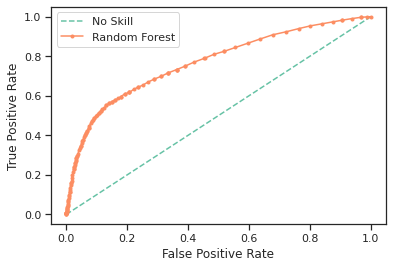

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = RF_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Grid Search

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF_classifier.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 35, 60, 85, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 110}

In [ ]:
y_pred_rand = rf_random.predict(X_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = accuracy_score(y_test, y_pred_rand)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.74%.


No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.769
Improved Random Forest: ROC AUC=0.786


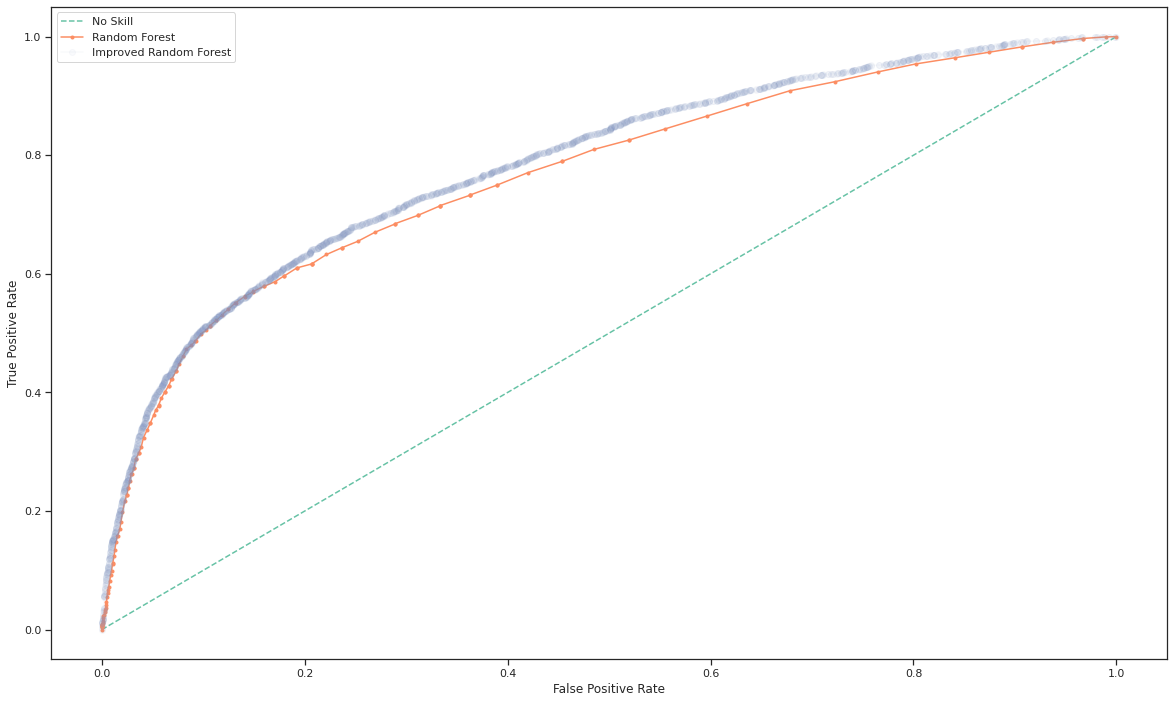

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(20, 12))

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = RF_classifier.predict_proba(X_test)
lr_probs_rand = rf_random.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs_rand = lr_probs_rand[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc_rand = roc_auc_score(y_test, lr_probs_rand)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
print('Improved Random Forest: ROC AUC=%.3f' % (lr_auc_rand))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_fpr_rand, lr_tpr_rand, _ = roc_curve(y_test, lr_probs_rand)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
plt.plot(lr_fpr_rand, lr_tpr_rand, marker='o', label='Improved Random Forest', alpha = 0.05)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()